## Anlayzing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("reviews_supplements.csv")
df.head()

In [26]:
len(df)

16671

In [27]:
count_df = df.groupby('rating').size().reset_index(name='Count')
count_df

,rating,Count
0,1,2029
1,2,722
2,3,957
3,4,1754
4,5,11209


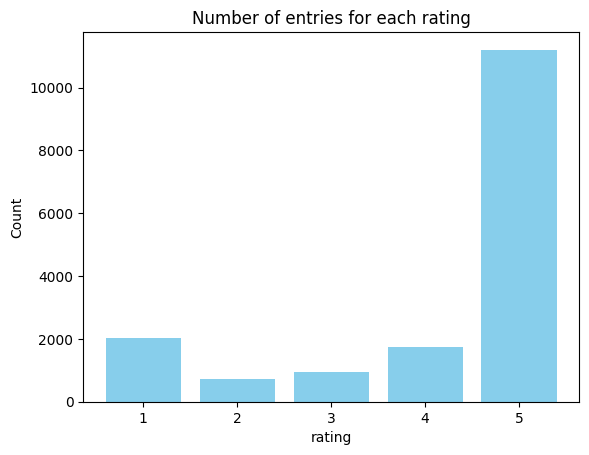

In [28]:
plt.bar(count_df['rating'], count_df['Count'], color='skyblue')
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('Number of entries for each rating')
# plt.xticks(rotation=0)
plt.show()

In [29]:
category_counts = df['helpful_vote'].value_counts()
category_counts

helpful_vote
0      11341
1       2379
2        927
3        503
4        341
       ...  
48         1
218        1
65         1
58         1
146        1
Name: count, Length: 94, dtype: int64

In [30]:
df.columns

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'date', 'time'],
      dtype='object')

In [33]:
# Count frequency of dates and times
date_counts = df['date'].value_counts().reset_index(name='count')
date_counts.columns = ['date', 'count']

time_counts = df['time'].value_counts().reset_index(name='count')
time_counts.columns = ['time', 'count']

# Sort by frequency (descending)
date_counts_sorted = date_counts.head(20).sort_values(by='count', ascending=False)
time_counts_sorted = time_counts.head(20).sort_values(by='count', ascending=False)


In [35]:
date_counts_sorted

,date,count
0,2017-01-10,20
1,2017-01-18,17
2,2020-01-06,17
3,2020-03-10,17
4,2017-04-18,17
5,2017-07-21,17
6,2017-09-26,17
7,2017-02-09,17
11,2017-03-13,16
10,2020-09-30,16


In [34]:
time_counts_sorted

,time,count
0,17:36,32
2,18:09,28
3,18:27,28
1,18:33,28
4,17:16,27
5,19:17,27
6,17:44,27
7,19:02,27
12,18:51,26
14,18:25,26


## Synthetic Data Generator Using LangChain

In [24]:
from langchain.prompts import FewShotPromptTemplate, PromptTemplate
from pydantic import BaseModel

from langchain.prompts import FewShotPromptTemplate, PromptTemplate
from langchain.output_parsers import PydanticOutputParser

from langchain_core.pydantic_v1 import BaseModel, Field

from pydantic import BaseModel, ConfigDict
from langchain_core.prompts.few_shot import FewShotPromptTemplate

class SyntheticDataGenerator(BaseModel):
    model_config = ConfigDict(arbitrary_types_allowed=True)

    template: FewShotPromptTemplate
    subject: str
    runs: int

from langchain_experimental.tabular_synthetic_data.base import SyntheticDataGenerator
from langchain_experimental.tabular_synthetic_data.prompts import (
    SYNTHETIC_FEW_SHOT_PREFIX,
    SYNTHETIC_FEW_SHOT_SUFFIX,
)

In [3]:
# class SupplementsReview(BaseModel):
#     rating: int
#     title: str
#     text: str
#     asin: str
#     parent_asin: str
#     user_id: str
#     timestamp: datetime
#     helpful_vote: int
#     verified purchase: boolean
#     date: datetime
#     time: datetime

examples = [
    {
        "example":"""rating: 5, title: excellent at relieving stress, text: this was recommended initially by an employee at a health food store.  he recommended taking 3 tablets in the AM and 3 at bed-time.  while this is probably overkill, and may not be recommended by true health care professionals, it works for me in improving my  mood and sense of well-being.  for safety, i recommend following the instructions on the Mega Stress 100 label, and of course following your health care professional's advice before taking any supplements.  however, the solution i outlined above has worked for me with great results.  granted, it can get expensive, which is why i chose to purchase the product from amazon instead of a local vendor with high overhead costs. Please let me know if you found this review helpful., asin: B00028NY44, parent_asin: B00028NY44, user_id: AHYXPH2PZZELOQB7T4CUIG5DKNXQ, timestamp: 24-12-2013  14:08:00, helpful_vote: 1, verified_purchase: True, date: 24-12-2013, time: 14:08"""
    },
    
    {
        "example":"""rating: 3, title: Might make you hot, red, and itchy, text: I ordered this for my husband and I. It did make me hot and a little itchy but my poor husband was so red, itchy, and hot, he did not like it at all. If you don't mind the hot and itchiness for 10 minutes I would recommend it but just be warned some people are a little more sensitive to it than others like my husband., asin: B0002D34K8, parent_asin: B0002D34K8, user_id: AHCJALAMDFEHGGSAGPVM72D7ZSZQ, timestamp: 26-04-2013  07:45:00, helpful_vote: 1, verified_purchase: True , date: 26-04-2013, time:07:45 """
    },
    
    {
        "example":"""rating: 4, title: Good B3, text: Very good vitamin product.i take to reduce cholesterol. Sometimes causes a flush, but not too bad. Overall a good product., asin: B0002D34K8, parent_asin: B0002D34K8, user_id: AEGI3QRMKI56K7M7RBXDDICBGHGA, timestamp: 10-01-2014  18:08:00, helpful_vote: 0, verified_purchase: , date: 10-01-2014, time: 18:08"""
    },
    
    {
        "example":"""rating: 1, title: Burns when urinatiing, text: I bought this for my husband because he has BPH, has locked up, and has had prostatitis in the past. However, when he takes it, it burns when he urinates. He stopped taking it and the burning disappeared. When he started again, the burning returned. We are disappointed that it hasn't helped.,asin: B0002DUEXS, parent_asin: B0002DUEXS, user_id: AGQNPJMYTQKRGEO7EGRT2IC7QTHA, timestamp: 17-02-2019 19:05, helpful_vote: 0, verified_purchase: True, date: 17-02-2019, time: 19:05"""
    },
    
    {
        "example":"""rating: 2, title: Nothing changed much after taking the supplement, text:, asin: B000FGXMWC, parent_asin: B000FGXMWC, user_id: AGB6GHZEQSEDRDF77QDXLLUT5ZKA, timestamp: 13-12-2015 19:23, helpful_vote: 8, verified_purchase: True, date: 13-12-2015, time: 19:23"""
    },
    {
        "example":"""rating: 5, title: I hope Thorne makes this stuff forever., text: I hope Thorne makes this stuff forever. It works great handling fungus and candida. Unfortunately, I can't swallow pills and must take these by popping the pills and squeezing them into water. Truly an awful taste but they really work and without making me ill. My body was so run down when I first started that I had to start slowly. I took me weeks to work up to 15 a day. I have been taking them for a year now. I was able to slowly reintroduce foods that I had become allergic to. Now I can eat milk products again!!! I have energy and can exercise. I plan on taking these the rest of my life. I only take 5 a day now., asin: B000FGXMWC, parent_asin: B000FGXMWC, user_id: AFBLBHUQUHCAOXLCZHKOLN3LKREA, timestamp: 23-01-2016 22:28, helpful_vote: 33, verified_purchase: True, date: 23-01-2016, time: 22:28"""
    },
    {
        "example":"""rating: 5, title: Worked Perfect to Kill Systemic Yeast Infectiin, text: Great to get rid of fungus infections!  I took 10 capsules 3X per day for the 1st 3 days... and felt really tired with all the yeast die-off.  Then I cut back to 5 tablets, 3X per day and wasn't tired at all.  Did this for 1 month and all my yeast sysmptoms are gone!,asin: B000FGXMWC, parent_asin: B000FGXMWC, user_id: AFOMTKMAZTZU2NNL5O2L2CNHIZKA, timestamp: 15-12-2017 00:09, helpful_vote: 130, verified_purchase: True, date: 15-12-2017, time: 00:09"""
    },
    {
        "example":"""rating: 1, title: Arrived unsealed and leaking through the box, text: Product seems good enough but it arrived unsealed, with the cap partially unscrewed, and with oil leaking through the shipping box.,asin: B017DT4HM2, parent_asin: B09KWWZN1L, user_id: AGJEM6JRWRJV2MW352QWDLYTDFSQ, timestamp: 08-11-2019 22:58, helpful_vote: 0, verified_purchase: True, date: 08-11-2019, time: 22:58"""
    },
    {
        "example":"""rating: 3, title: Not sure about this product. Every fractionated coconut oil ..., text: Not sure about this product. Every fractionated coconut oil I have gotten in the past has been 100% clear. This has a light yellowish color not convinced it's the real deal., asin: B017DT4HM2, parent_asin: B09KWWZN1L, user_id: AHQKG4HNOG4BL32UQTDMRXRDPVFA, timestamp: 16-06-2017 17:39, helpful_vote: 5, verified_purchase: True, date: 16-06-2017, time: 17:39"""
    },
    {
        "example":"""rating: 4, title: I love this Ginger powder, text: This ginger powder has a nice fragrant gingery smell and flavor. Pleased with my purchase., asin: B08QVXG5XW, parent_asin: B08QVXG5XW, user_id: AEUBM5IAKYVPSDEZ735TLVWFCOBA, timestamp: 27-01-2022 13:10, helpful_vote: 2, verified_purchase: True, date: 27-01-2022, time: 13:10"""
    }
]

# <s> [INST] Instruction [/INST] Model answer</s> [INST] Follow-up instruction [/INST]


In [25]:
example_prompt = PromptTemplate(
    input_variables=["example"],
    template="{example}"
)

prompt_template = FewShotPromptTemplate(
    prefix=SYNTHETIC_FEW_SHOT_PREFIX,
    examples=examples,
    suffix=SYNTHETIC_FEW_SHOT_SUFFIX,
    # input_variables= [ "extra"],
    example_prompt=example_prompt,
)
print(prompt_template)

input_variables=['extra', 'subject'] input_types={} partial_variables={} examples=[{'example': "rating: 5, title: excellent at relieving stress, text: this was recommended initially by an employee at a health food store.  he recommended taking 3 tablets in the AM and 3 at bed-time.  while this is probably overkill, and may not be recommended by true health care professionals, it works for me in improving my  mood and sense of well-being.  for safety, i recommend following the instructions on the Mega Stress 100 label, and of course following your health care professional's advice before taking any supplements.  however, the solution i outlined above has worked for me with great results.  granted, it can get expensive, which is why i chose to purchase the product from amazon instead of a local vendor with high overhead costs. Please let me know if you found this review helpful., asin: B00028NY44, parent_asin: B00028NY44, user_id: AHYXPH2PZZELOQB7T4CUIG5DKNXQ, timestamp: 24-12-2013  14:0

In [ ]:
from langchain_groq import ChatGroq
import os
# GROQ_API_KEY="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",
os.environ["GROQ_API_KEY"] = os.environ.get("GROQ_API_KEY")

llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0.5,
    max_retries=2,
    
)

# context = ""
subject = "You're a synthetic data generator expert in Synthetic data generation for customer reviews related to supplements and vitamins sold on Amazon. The dataset should mimic real user feedback, with both positive and negative experiences, including information on product efficacy, side effects, shipping, and pricing. The reviews should appear authentic and human-like, incorporating occasional grammatical errors, informal language, and subjective opinions. The goal is to generate diverse customer feedback, representing a wide range of experiences and opinions, while maintaining the format and structure of real reviews. The generated dataset should be in a CSV file with the following columns and their datatypes: rating (int), title (str), text (str), asin (str), parent_asin (str), user_id (str), timestamp (datetime), helpful_vote (int), verified_purchase (boolean), date (datetime), time (datetime)."
extra = [
    "Observe the subtle patterns and format of values entered in every column to generate resembling but not duplicate synthetic values.",
    "Ensure that the 'rating' values range from 1 to 5, representing varied customer experiences.",
    "Generate realistic 'title' and 'text' entries that resemble actual human reviews, with occasional grammatical errors, informal language, and simple sentence structures to reflect authentic user feedback.",
    "For 'asin' and 'parent_asin', generate unique, realistic alphanumeric strings that conform to the format used in actual product identifiers.",
    "Ensure 'user_id' values are randomized alphanumeric strings that mimic real customer IDs.",
    "Generate timestamps in the format 'DD-MM-YYYY HH:MM:SS', ensuring a variety of dates and times, spanning across different years for diversity in review timelines.",
    "The 'helpful_vote' should be an integer with random variation across different reviews.",
    "The 'date' should match the 'timestamp' date component, and the 'time' should correspond to the time component, formatted as 'HH:MM'."
]
extra = "Observe the subtle patterns and format of values entered in every column to generate resembling but not duplicate synthetic values."


generator = SyntheticDataGenerator(template=prompt_template, llm=llm)
results = generator.generate(
    subject="You're a synthetic data generator expert in Synthetic data generation for customer reviews related to supplements and vitamins sold on Amazon. The dataset should mimic real user feedback, with both positive and negative experiences, including information on product efficacy, side effects, shipping, and pricing. The reviews should appear authentic and human-like, incorporating occasional grammatical errors, informal language, and subjective opinions. The goal is to generate diverse customer feedback, representing a wide range of experiences and opinions, while maintaining the format and structure of real reviews. The generated dataset should be in a CSV file with the following columns and their datatypes: rating (int), title (str), text (str), asin (str), parent_asin (str), user_id (str), timestamp (datetime), helpful_vote (int), verified_purchase (boolean), date (datetime), time (datetime).",
    runs=50,
    extra=extra,
)
results[0]